Họ và tên : Nguyễn Minh Phú 

MSSV : 20280072

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

df = pd.read_csv("HomeWork-churn_rate_prediction.csv",low_memory=False)
df.head()
#ToDo: Show histogram of dataframe

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [3]:
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

1

In [4]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Analysis

In [5]:
dep_var = 'churn_risk_score'

In [6]:
df_tree = df.copy()
numeric_cols = df_tree.select_dtypes(include='number')
numeric_cols = numeric_cols.dropna()




In [7]:
numeric_cols.loc[numeric_cols['churn_risk_score'] == -1, 'churn_risk_score'] = 4
numeric_cols.loc[numeric_cols['churn_risk_score'] > 5, 'churn_risk_score'] = 0
numeric_cols = numeric_cols.loc[numeric_cols['churn_risk_score'] != -1]

In [8]:
X = numeric_cols.drop(['churn_risk_score'],axis=1).values
Y = numeric_cols['churn_risk_score'].values
Y = Y-1

In [9]:
from sklearn.preprocessing import RobustScaler,Normalizer
np.random.seed(42)
scaler = RobustScaler()
X = scaler.fit_transform(X)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=15, min_samples_split=10, min_samples_leaf=12)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       705
           1       0.70      0.38      0.49       781
           2       0.69      0.82      0.75      2866
           3       0.57      0.69      0.63      3053
           4       0.72      0.51      0.60      2660

    accuracy                           0.65     10065
   macro avg       0.67      0.60      0.62     10065
weighted avg       0.66      0.65      0.64     10065

0.6186296768789962


### Sử dụng dtreeviz để thấy được các phân phối cũng như tác động của các features tới cây


#### uncomment to see dtree

In [11]:

import dtreeviz


viz_model = dtreeviz.model(dt,
                           X_train=X_train, y_train=y_train,
                           feature_names=numeric_cols.columns,
                           target_name=dep_var)
#v = viz_model.view()     # render as SVG into internal object 
#v.show()                 # pop up window
#v.save(r"C:\Users\Phu\OneDrive - VNU-HCMUS\TH_ML\Week 04\numeric_tree.svg")  # optionally save as svg


Demo png

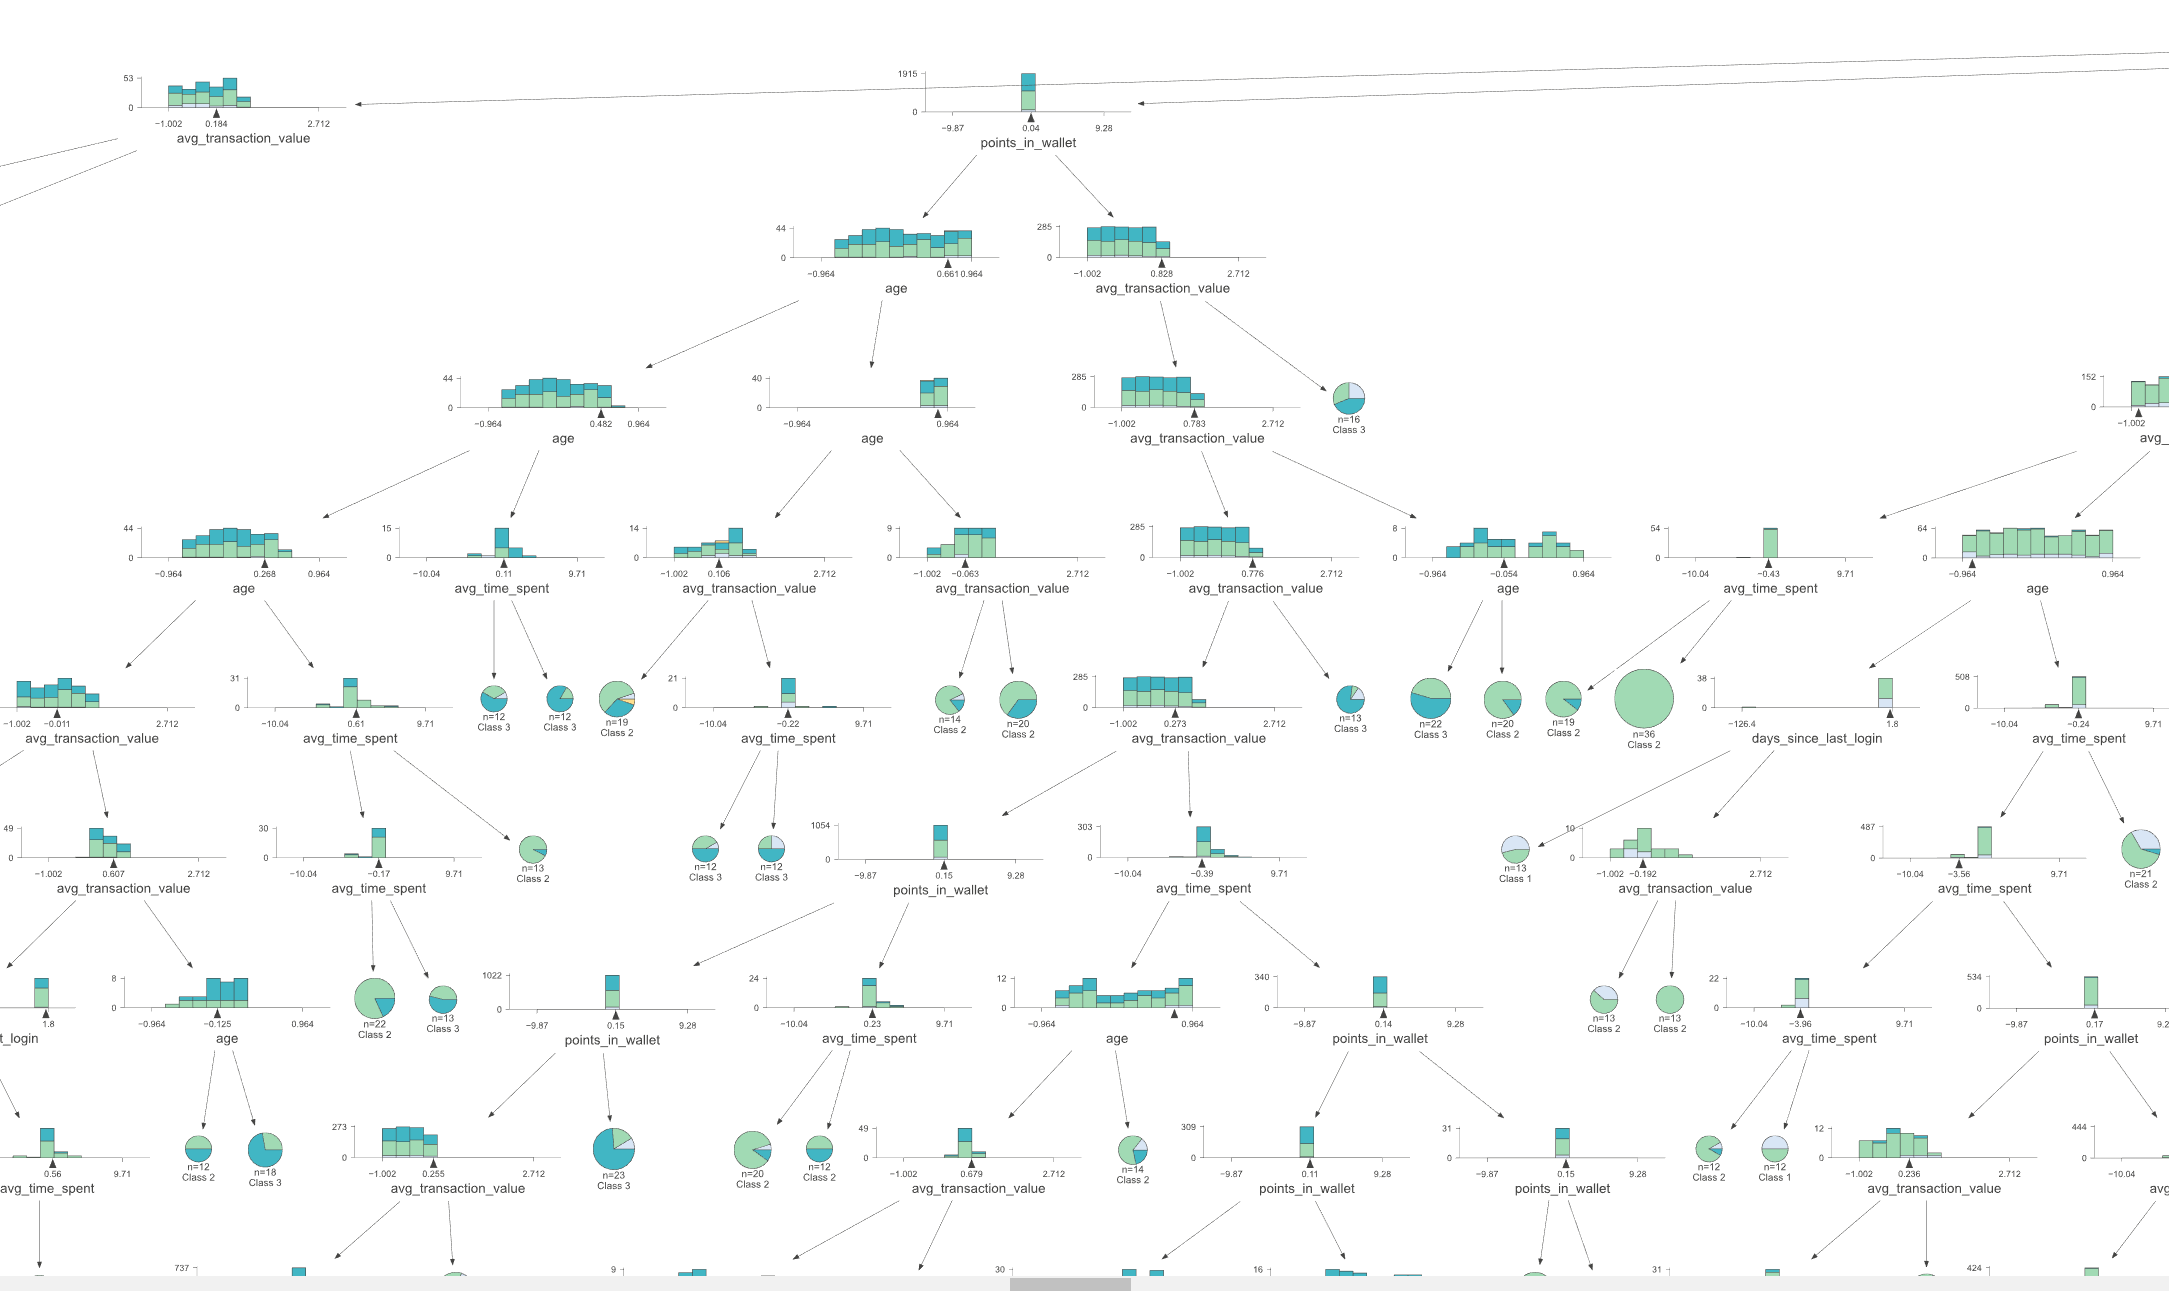

In [12]:
from IPython.display import Image
Image(filename=r'C:\Users\Phu\OneDrive - VNU-HCMUS\TH_ML\Week 04\numeric_tree_demo.png')


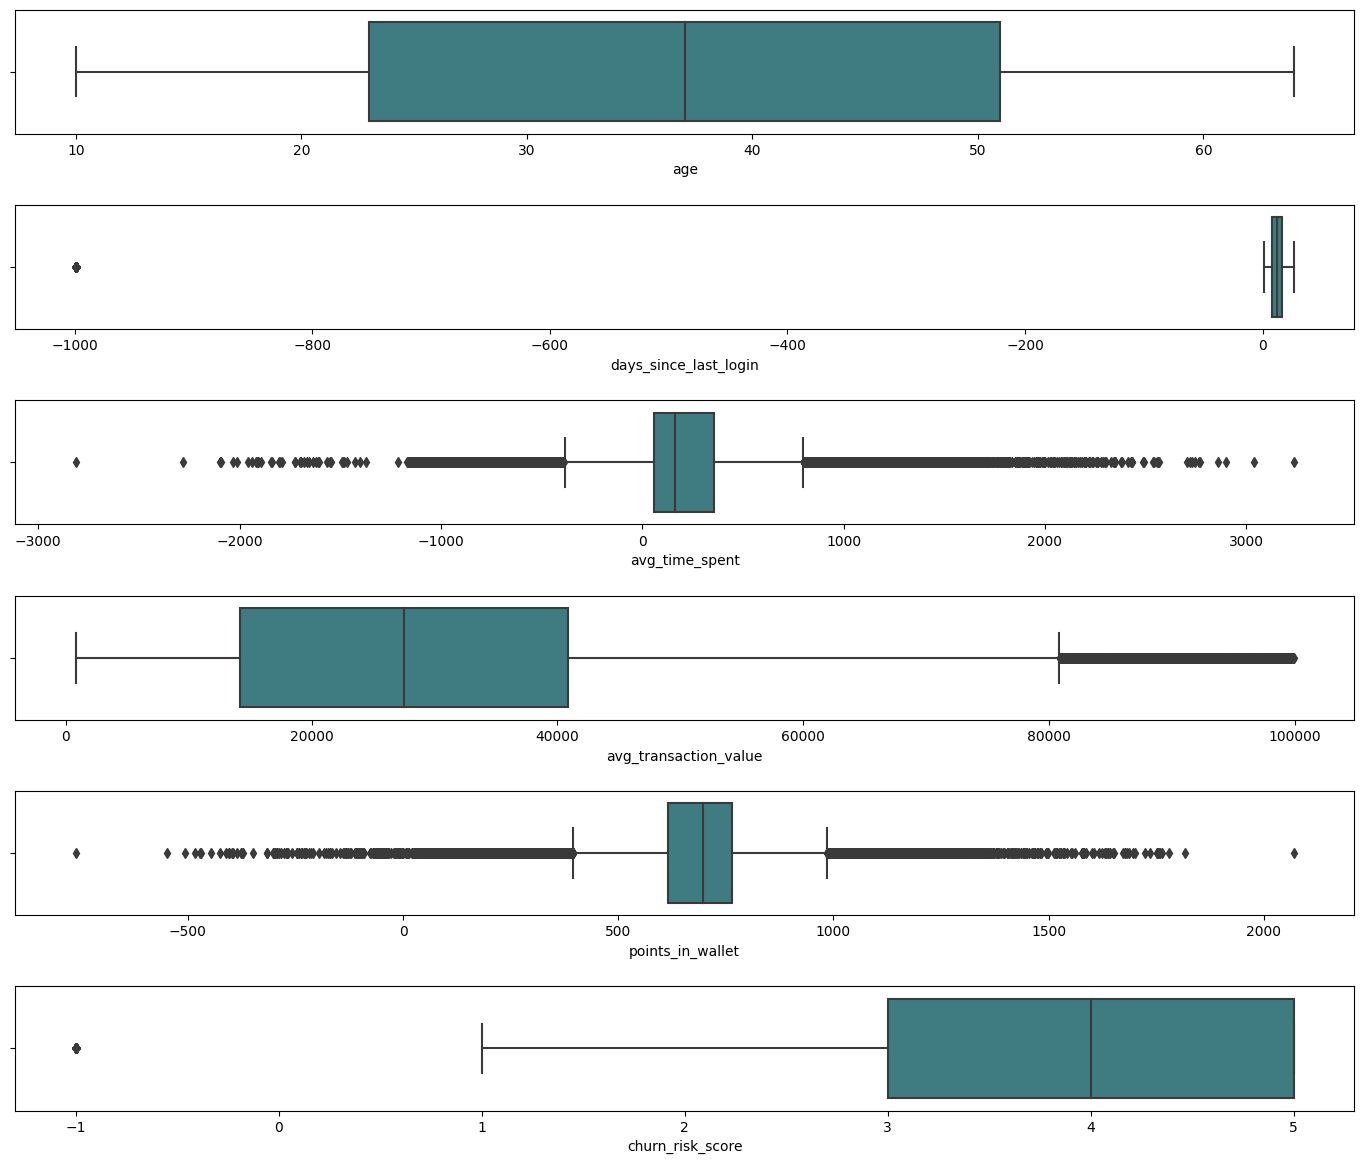

In [13]:
%matplotlib inline
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

## Preprocessing

In [14]:
import pandas as pd
import numpy as np

def clean_data(df):
    # drop unnecessary columns
    df.drop(['customer_id', 'Name', 'security_no', 'referral_id'], axis=1, inplace=True)
    
    # replace 'Error' values with NaN
    df['avg_frequency_login_days'].replace(['Error'], np.nan, inplace=True)
    
    # convert data types
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float64')
    
    # remove negative values and NaNs
    df = df[df['avg_time_spent'] >= 0]
    df = df[df['points_in_wallet'] >= 0]
    df = df[df['avg_frequency_login_days'] >= 0]
    df = df[df['avg_transaction_value'] >= 0]
    df = df[df['days_since_last_login'] >= 0]
    df.dropna(how='any', inplace=True)
    
    # convert date columns to datetime
    df['joining_date'] = pd.to_datetime(df['joining_date'])
    df['last_visit_time'] = pd.to_datetime(df['last_visit_time'])
    
    # extract date features
    df['jday'] = df['joining_date'].dt.day
    df['jmonth'] = df['joining_date'].dt.month
    df['jweek'] = df['joining_date'].dt.dayofweek
    
    # calculate time difference between 'joining_date' and 'last_visit_time'
    df['diff'] = (df['last_visit_time'] - df['joining_date']).apply(lambda x: int(str(x).split()[0]))
    
    # remove rows with 'churn_risk_score' == -1
    df = df[df['churn_risk_score'] != -1]
    
    # select certain columns for further processing
    sm = ['gender', 'region_category', 'membership_category', 'joined_through_referral',
          'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount',
          'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
    df_sm = df[sm]
    
    return df, df_sm


In [15]:
df , df_sm = clean_data(df)

## Feature Engineering

In [16]:
df_sm = pd.get_dummies(df_sm)


In [17]:
ss = ['days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days',
'points_in_wallet','churn_risk_score','jday','jmonth','jweek','diff']
df_ss = df[ss]

In [18]:
df_new = pd.concat([df_ss,df_sm],axis=1)


In [19]:
df_new['avg_frequency_login_days'].fillna(value=df_new['avg_frequency_login_days'].mean(),inplace=True)
df_new['points_in_wallet'].fillna(value=df_new['points_in_wallet'].mean(),inplace=True)

In [20]:
df_new.dropna(axis=0,how='any',inplace=True)

In [21]:
df_new['churn_risk_score']=df_new['churn_risk_score']-1
#df_new['churn_risk_score'].unique()

# Apply machine learning model

## Train-test split

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [22]:
from imblearn.over_sampling import SMOTE

def perform_oversampling(X, Y):
    # split the data into X and Y

    
    # perform oversampling using SMOTE
    oversampler = SMOTE()
    X_ov, Y_ov = oversampler.fit_resample(X, Y)
    
    # print the shape of the dataset before and after oversampling
    print('The dataset before oversampling: ', X.shape, Y.shape)
    print('The dataset after oversampling: ', X_ov.shape, Y_ov.shape)
    
    # return the oversampled dataset as a new DataFrame
    print(sum(Y == 0),sum(Y_ov == 0))
    print(sum(Y == 1),sum(Y_ov == 1))
    print(sum(Y == 2),sum(Y_ov == 2))
    print(sum(Y == 3),sum(Y_ov == 3))
    print(sum(Y == 4),sum(Y_ov == 4))

    
    return X_ov,Y_ov


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler,Normalizer
def PrepareX_Y(df,target_value):
    X = df.drop(['churn_risk_score'],axis=1).values
    Y = df['churn_risk_score'].values
    X_ov,Y_ov=perform_oversampling(X,Y)
    
    scaler = RobustScaler()
    X_ov = scaler.fit_transform(X_ov)
    # load your data into a pandas dataframe
    x_train,x_test,y_train,y_test = train_test_split(X_ov,Y_ov,train_size=0.7)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    return x_train,x_test,y_train,y_test

In [24]:
np.random.seed(42)
x_train,x_test,y_train,y_test = PrepareX_Y(df_new,dep_var)

The dataset before oversampling:  (21870, 54) (21870,)
The dataset after oversampling:  (32045, 54) (32045,)
1640 6409
1658 6409
6409 6409
6202 6409
5961 6409
(22431, 54) (22431,)
(9614, 54) (9614,)


## Build SK-learn model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
np.random.seed(42)
rf = RandomForestClassifier(n_estimators=1000,max_depth=25,n_jobs=8)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1889
           1       0.94      0.88      0.91      1915
           2       0.90      0.96      0.93      1908
           3       0.82      0.54      0.65      1956
           4       0.72      0.92      0.81      1946

    accuracy                           0.85      9614
   macro avg       0.85      0.85      0.84      9614
weighted avg       0.85      0.85      0.84      9614

0.8414440222050231


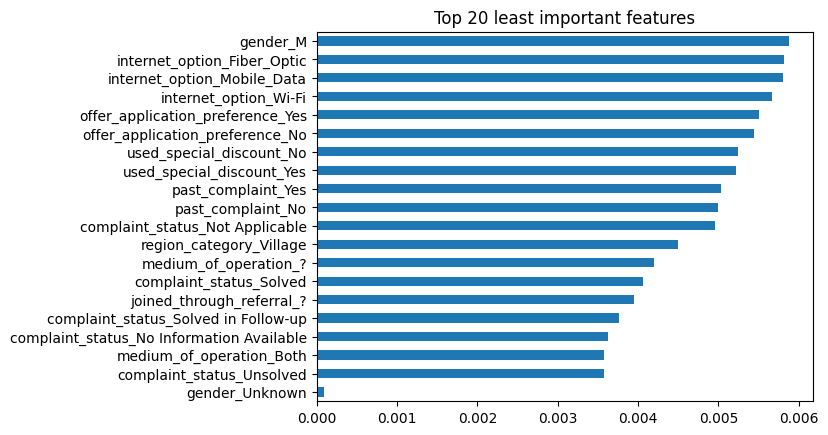

In [26]:
feat_importances = pd.Series(rf.feature_importances_, index=df_new.drop(['churn_risk_score'],axis=1).columns)
feat_importances.nsmallest(20).plot(kind='barh')
plt.title("Top 20 least important features")
plt.show()

Remove some unimportant features

In [27]:
column_leastImportance = feat_importances.nsmallest(20).index.tolist()

In [28]:
df_remove_leastImportance = df_new.drop(column_leastImportance,axis=1)

In [29]:
np.random.seed(38)
x_train,x_test,y_train,y_test = PrepareX_Y(df_new,dep_var)

The dataset before oversampling:  (21870, 54) (21870,)
The dataset after oversampling:  (32045, 54) (32045,)
1640 6409
1658 6409
6409 6409
6202 6409
5961 6409
(22431, 54) (22431,)
(9614, 54) (9614,)


Cross Validation test chạy từng phần riêng ở ngoài trước để tránh việc train quá lâu

In [30]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

# y_train = y_train-1
# y_test = y_test -1
# # load your data into a pandas dataframe
# np.random.seed(42)


# # define the parameter grid for each model
# #dt_param_grid = {'max_depth': [5, 10, 20, None]}
# rf_param_grid = {'n_estimators': [ 500, 1000,1500], 'max_depth': [ 20,25]}
# #xgb_param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 20, None], 'learning_rate': [0.01, 0.1, 0.5]}
# #cat_param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 20, None], 'learning_rate': [0.01, 0.1, 0.5]}

# # instantiate the models
# #dt = DecisionTreeClassifier()
# rf = RandomForestClassifier()
# xgb = XGBClassifier()
# cat = CatBoostClassifier()

# # perform GridSearchCV on each model using the parameter grid and training data
# #dt_grid = GridSearchCV(dt, dt_param_grid, cv=5,n_jobs=8, scoring="f1_macro")
# rf_grid = GridSearchCV(rf, rf_param_grid, cv=5,n_jobs=8, scoring="f1_macro")
# #xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5,n_jobs=8, scoring="f1_macro")
# #cat_grid = GridSearchCV(cat, cat_param_grid, cv=5,n_jobs=8, scoring="f1_macro")

# #dt_grid.fit(x_train, y_train)
# rf_grid.fit(x_train, y_train)
# #xgb_grid.fit(x_train, y_train)
# #cat_grid.fit(x_train, y_train)

# # print the best parameters and best score for each model
# #print('Decision Tree:', dt_grid.best_params_, dt_grid.best_score_)
# print('Random Forest:', rf_grid.best_params_, rf_grid.best_score_)
# #print('XGBoost:', xgb_grid.best_params_, xgb_grid.best_score_)
# #print('CatBoost:', cat_grid.best_params_, cat_grid.best_score_)

# # evaluate each model on the test set
# #print('Decision Tree Test Score:', dt_grid.score(X_test, y_test))
# print('Random Forest Test Score:', rf_grid.score(x_test, y_test))
# #print('XGBoost Test Score:', xgb_grid.score(X_test, y_test))
# #print('CatBoost Test Score:', cat_grid.score(X_test, y_test))


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
np.random.seed(38)
rf = RandomForestClassifier(n_estimators=1000,max_depth=25,n_jobs=8)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1893
           1       0.94      0.88      0.91      1996
           2       0.89      0.95      0.92      1895
           3       0.80      0.54      0.65      1919
           4       0.73      0.91      0.81      1911

    accuracy                           0.85      9614
   macro avg       0.85      0.85      0.84      9614
weighted avg       0.85      0.85      0.84      9614

0.8392848012657609


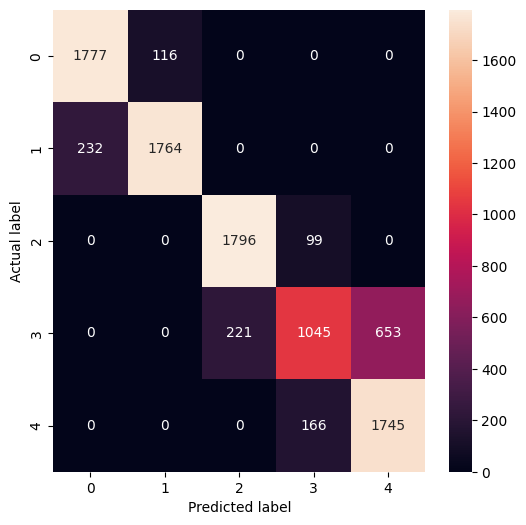

In [32]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

Tăng accuracy 83->84 khi loại bỏ các features có sức ảnh hưởng nhỏ

In [33]:
from sklearn.neural_network import MLPClassifier
np.random.seed(38)

mlp = MLPClassifier(hidden_layer_sizes=(150,200,250))
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1893
           1       0.94      0.93      0.93      1996
           2       0.91      0.92      0.91      1895
           3       0.67      0.66      0.67      1919
           4       0.75      0.76      0.75      1911

    accuracy                           0.84      9614
   macro avg       0.84      0.84      0.84      9614
weighted avg       0.84      0.84      0.84      9614

0.8399684570776443


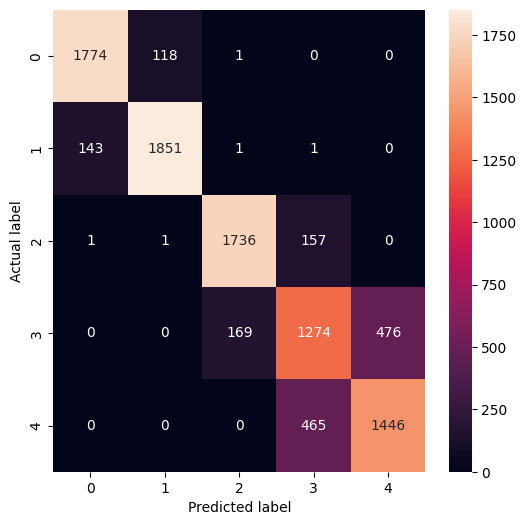

In [34]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(38)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=15, min_samples_split=12, min_samples_leaf=7)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1893
           1       0.87      0.84      0.86      1996
           2       0.93      0.91      0.92      1895
           3       0.70      0.64      0.67      1919
           4       0.74      0.81      0.77      1911

    accuracy                           0.82      9614
   macro avg       0.82      0.82      0.81      9614
weighted avg       0.82      0.82      0.81      9614

0.8145297217801231


In [36]:

import dtreeviz


viz_model = dtreeviz.model(tree,
                           X_train=x_train, y_train=y_train,
                           feature_names=df_new.columns,
                           target_name=dep_var)



### Uncomment to see output

In [37]:
#v = viz_model.view()     # render as SVG into internal object 
#v.show()                 # pop up window
#v.save(r"C:\Users\Phu\OneDrive - VNU-HCMUS\TH_ML\Week 04\churnrate1.svg")  # optionally save as svg

demo a part of dtreeviz

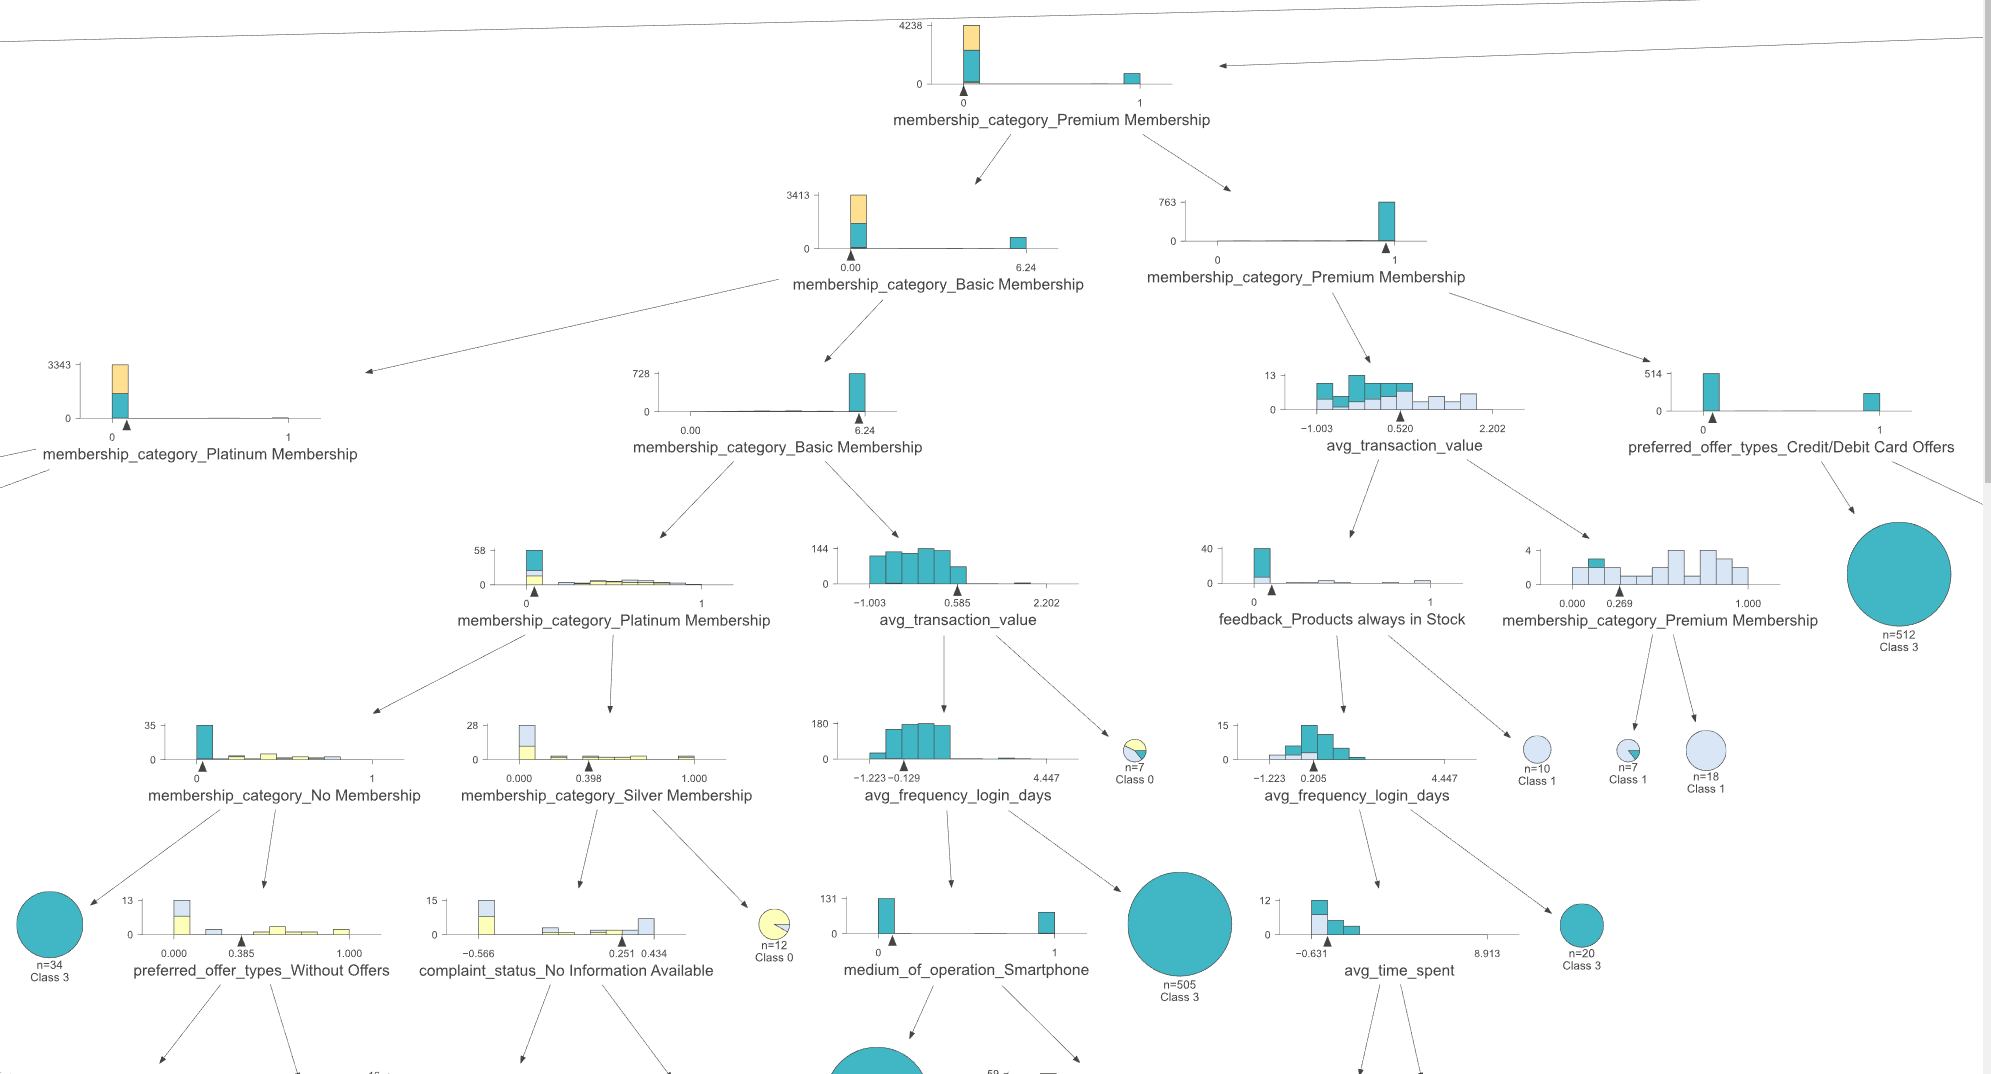

In [38]:
from IPython.display import Image
Image(filename=r'C:\Users\Phu\OneDrive - VNU-HCMUS\TH_ML\Week 04\churnrate.png')


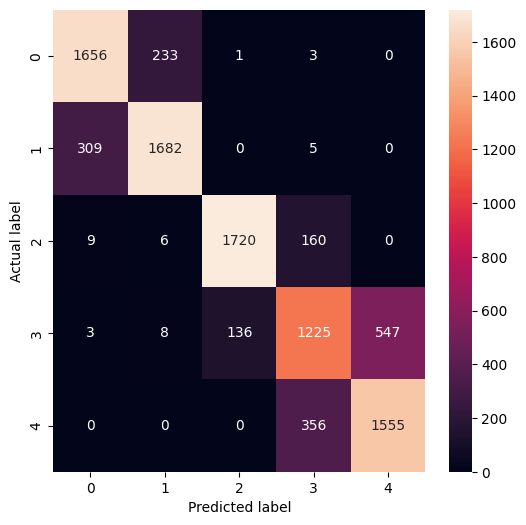

In [39]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

0.85 0.8506

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(38)
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=10,min_samples_leaf = 4, min_samples_split= 5)
gbrt.fit(x_train,y_train)
y_pred = gbrt.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1893
           1       0.95      0.90      0.92      1996
           2       0.92      0.94      0.93      1895
           3       0.72      0.65      0.68      1919
           4       0.75      0.81      0.78      1911

    accuracy                           0.85      9614
   macro avg       0.85      0.85      0.85      9614
weighted avg       0.85      0.85      0.85      9614

0.8479087342361309


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(38)
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=10,min_samples_leaf = 5, min_samples_split= 7,warm_start=True)
gbrt.fit(x_train,y_train)
y_pred = gbrt.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1893
           1       0.95      0.90      0.93      1996
           2       0.92      0.93      0.92      1895
           3       0.73      0.65      0.69      1919
           4       0.76      0.82      0.79      1911

    accuracy                           0.85      9614
   macro avg       0.85      0.85      0.85      9614
weighted avg       0.85      0.85      0.85      9614

0.8495342277517004


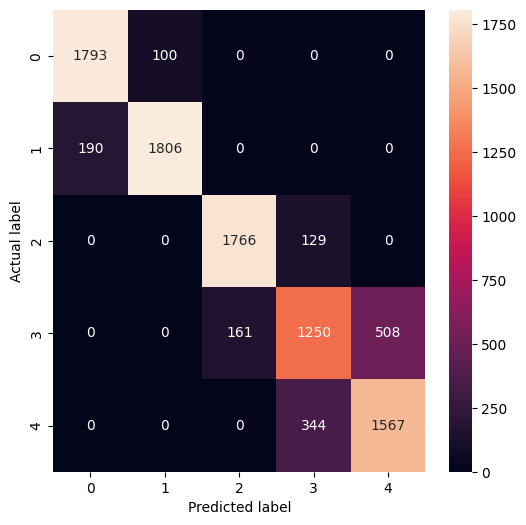

In [42]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

0.86 0.856 1200 15

In [43]:
from xgboost import XGBClassifier
np.random.seed(38)
xgb = XGBClassifier(n_jobs=-1,n_estimators=1200,max_depth=15)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1893
           1       0.96      0.92      0.94      1996
           2       0.92      0.93      0.92      1895
           3       0.72      0.67      0.69      1919
           4       0.77      0.80      0.78      1911

    accuracy                           0.86      9614
   macro avg       0.86      0.86      0.86      9614
weighted avg       0.86      0.86      0.86      9614

0.8562366497011918


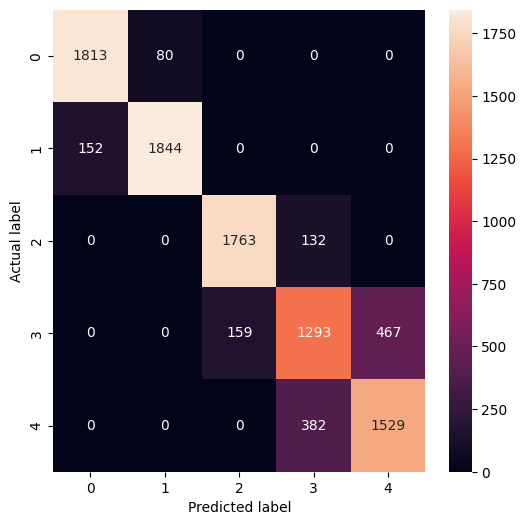

In [44]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [45]:
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.linear_model as sklm

In [46]:
class MixModel(skb.BaseEstimator, skb.RegressorMixin, skb.TransformerMixin):

    def __init__(self, algs):
        self.algs = algs

    def fit(self, X, y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        
       
        for alg in self.algs_:
            alg.fit(X, y)

        return self
    

    def predict(self, X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return (np.mean(predictions, axis=1)).astype('int64')

In [47]:
mixed_model = MixModel(algs = [xgb,rf,gbrt])
np.random.seed(42)
mixed_model.fit(x_train, y_train)
y_pred = mixed_model.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1893
           1       0.97      0.86      0.91      1996
           2       0.88      0.98      0.92      1895
           3       0.70      0.68      0.69      1919
           4       0.80      0.73      0.76      1911

    accuracy                           0.84      9614
   macro avg       0.84      0.84      0.84      9614
weighted avg       0.84      0.84      0.84      9614

0.8401429172846342


In [48]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "Coi giúp em markdown ở dưới ạ" \
           "Other conclusion: "

Which metric is your main metric for this problem and why? What is your main model as well as their params and why?

Vì trong bài toán này nếu xét thì chúng ta mong muốn model của ta có được đồng thời precision và recall cao bởi ta muốn có được kết quả dự đoán chính xác cùng với đó là không bỏ sót các trường hợp mà có thể xảy ra khi khách hàng rời bỏ (churn risk rate) vì thế F1 sẽ là một metric phù hợp với bài toán.

Trước tiên xét F1 score được học ở bài Logistic regression là một phương pháp đánh giá thường được sử dụng trong các bài toán phân loại nhị phân, trong đó chúng ta quan tâm đến các trường hợp positive và negative. Trong cuộc thi này, điểm rủi ro chốt của việc rời bỏ khách hàng dao động từ 1 đến 5, điều này có nghĩa là chúng ta có một bài toán phân loại đa lớp. Tuy nhiên, chúng ta vẫn có thể sử dụng điểm F1 như một phương pháp đánh giá bằng cách xem xét mỗi lớp là trường hợp dương và phần còn lại là trường hợp âm. Điều này được gọi là điểm F1 trung bình macro.

Điểm F1 trung bình macro tính toán điểm F1 cho mỗi lớp một cách độc lập và sau đó lấy trung bình của các điểm số này. Độ đo này hữu ích trong những tình huống mà chúng ta muốn đảm bảo rằng mô hình hoạt động tốt trên tất cả các lớp, không chỉ riêng lớp đa số. Ví dụ, nếu hầu hết khách hàng có điểm rủi ro chốt là 2, một mô hình luôn dự đoán 2 sẽ có độ chính xác cao nhưng có thể không hữu ích trong thực tế.

Do đó, ta chọn F1 làm phương pháp đánh giá để đảm bảo rằng các mô hình tham gia hoạt động tốt trên tất cả các lớp, không chỉ riêng lớp đa số.

Main Model em chọn ở đây là XGBClassifier với parameters là :n_jobs=-1,n_estimators=1200,max_depth=15
n_jobs=-1 để chạy hết khả năng của cores cpu .
n_estimators=1200,max_depth=15 là các parameters mà em tunes cho ra được kết quả tốt nhất 

Lý do chính em chọn model này là vì ra được kết quả tốt nhất giữa các model với accuracy -> 86% và f1-macro ~~ 85.6 và vẫn có được tính giải thích gần giống với Random Forest

## Bonus

## Liệu Deep learning có thể cải thiện hơn được không

In [49]:
from fastbook import *
from fastai.tabular.all import *


In [50]:
train_ratio = 0.7
valid_ratio = 1 - train_ratio

# Get the total number of rows in the dataframe
total_rows = df_new.shape[0]

# Compute the number of rows for training and validation sets
train_rows = int(total_rows * train_ratio)
valid_rows = total_rows - train_rows

# Create a boolean mask to split the data
split_mask = np.zeros(total_rows, dtype=bool)
split_mask[:train_rows] = True

# Create the indices for the training and validation sets
train_idx = np.where(split_mask)[0]
valid_idx = np.where(~split_mask)[0]

# Split the indices into training and validation sets
train_idx = train_idx[:train_rows]
valid_idx = valid_idx[:valid_rows]

# Update the splits variable
splits = (list(train_idx), list(valid_idx))


In [51]:
cont_nn,cat_nn = cont_cat_split(df_new, max_card=500, dep_var=dep_var)

In [52]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_new, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var,y_block = CategoryBlock())

In [53]:
dls = to_nn.dataloaders(1024)

In [54]:
y = to_nn.train.y
y.min(),y.max()

(0, 4)

In [55]:
learn = tabular_learner(dls, layers=[250,500],metrics=[accuracy])

SuggestedLRs(valley=0.0006918309954926372)

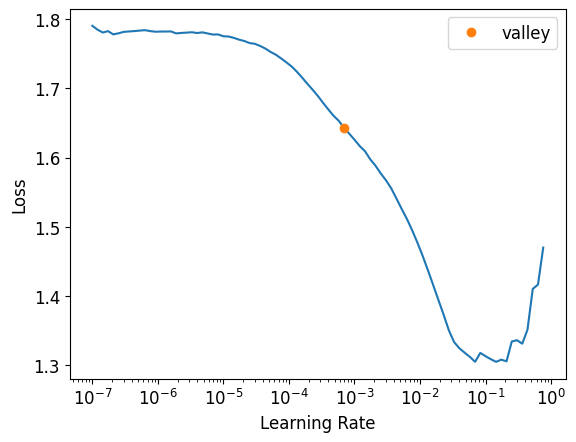

In [56]:
learn.lr_find()

In [57]:
learn.fit_one_cycle(10, 0.005)

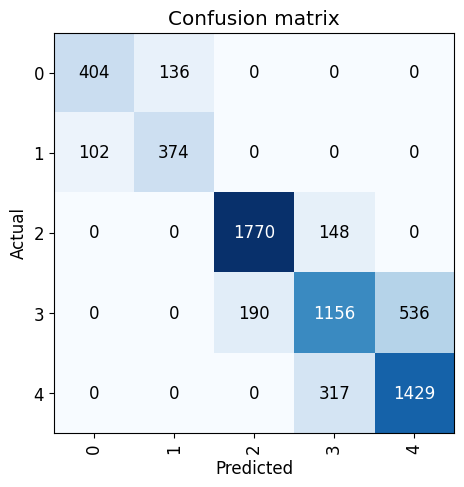

In [58]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

In [59]:
interpret.print_classification_report()


              precision    recall  f1-score   support

           0       0.80      0.75      0.77       540
           1       0.73      0.79      0.76       476
           2       0.90      0.92      0.91      1918
           3       0.71      0.61      0.66      1882
           4       0.73      0.82      0.77      1746

    accuracy                           0.78      6562
   macro avg       0.78      0.78      0.77      6562
weighted avg       0.78      0.78      0.78      6562



"Có thể" cải thiện thêm nếu có thể interpret oversampling và robustscaler và model DE

Nhưng tạm thời thì chưa

## Các model ở trên có thể "sai" khi ta dính một lỗi đó là tự ý oversampling test set và có thể dẫn đến bias . Ta có thể cập nhật ở phần xử lý data input model như sau :

In [ ]:
def perform_oversampling(X, Y):
    oversampler = SMOTE()
    X_ov, Y_ov = oversampler.fit_resample(X, Y)
    print('The dataset before oversampling:', X.shape, Y.shape)
    print('The dataset after oversampling:', X_ov.shape, Y_ov.shape)
    return X_ov, Y_ov

def PrepareX_Y(df, target_value):
    X = df.drop(['churn_risk_score'], axis=1).values
    Y = df['churn_risk_score'].values

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

    # Perform oversampling on the training set
    x_train_ov, y_train_ov = perform_oversampling(x_train, y_train)

    scaler = RobustScaler()
    x_train_ov = scaler.fit_transform(x_train_ov)
    x_test = scaler.transform(x_test)

    print('Train set shape after oversampling:', x_train_ov.shape, y_train_ov.shape)
    print('Test set shape:', x_test.shape, y_test.shape)

    return x_train_ov, x_test, y_train_ov, y_test

np.random.seed(42)
x_train, x_test, y_train, y_test = PrepareX_Y(df_new, dep_var)
